In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm

In [2]:
diabetes_data = pd.read_csv('diabetes_dataset.csv')
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(diabetes_data.info())
print(diabetes_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [4]:
print("Missing values per column:\n", diabetes_data.isnull().sum())

Missing values per column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
#replace zeroes with NaN
def replace_nan(data, columns):

    data = data.copy()
    data[columns] = data[columns].replace(0, np.nan)
    return data

#columns to replace zero
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
cleaned_data = replace_nan(diabetes_data, columns_to_replace)

In [6]:
#fill NaN values with median
def fill_median(data, columns):

    for column in columns:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
    return data

#missing values with median
final_cleaned_data = fill_median(cleaned_data, columns_to_replace)
print("Data after filling NaN values with medians:\n", final_cleaned_data.head())

figsize = (10, 6)

Data after filling NaN values with medians:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_1486/655675623.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)


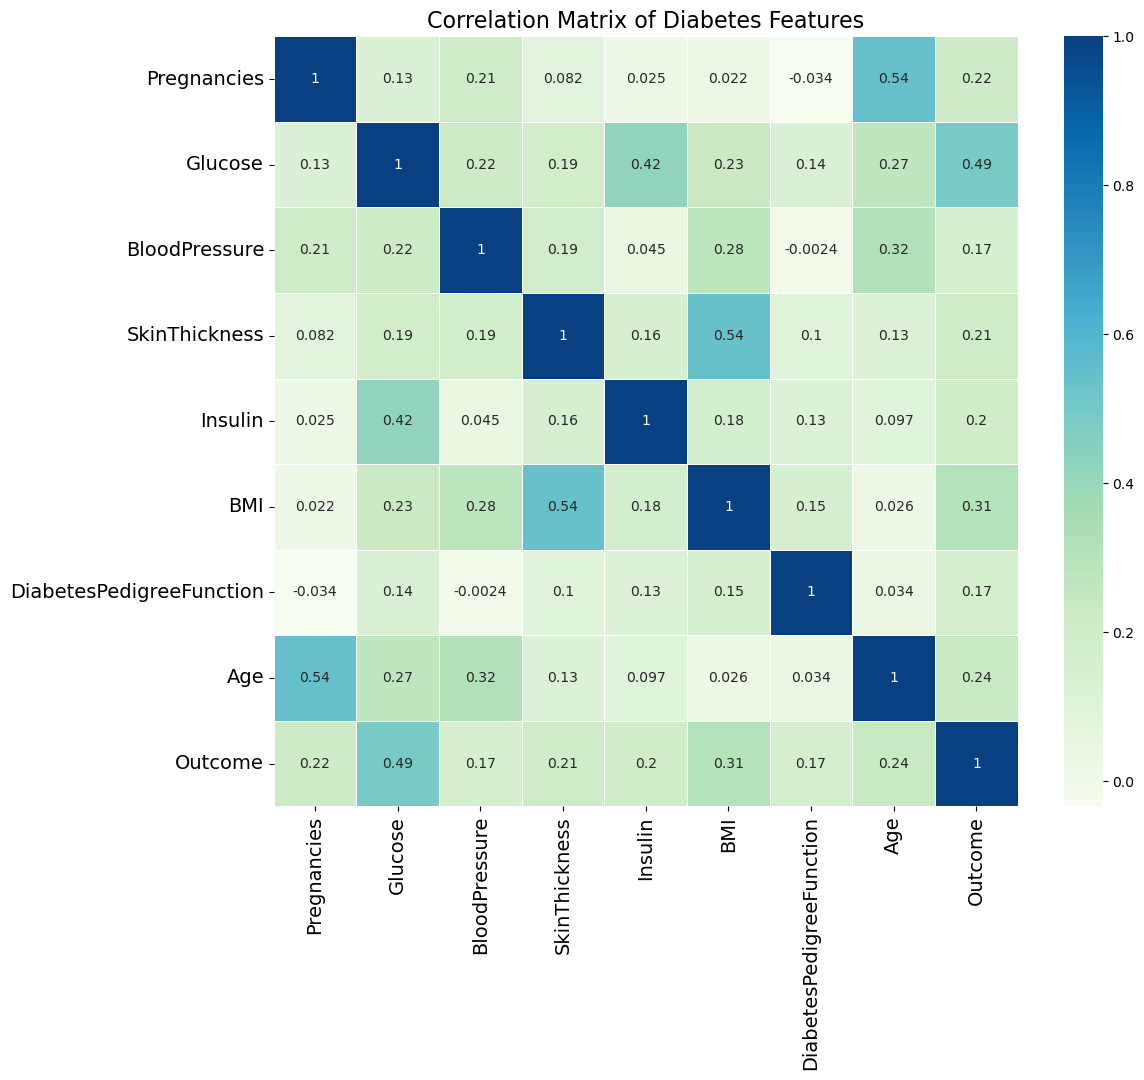

In [7]:
# Correlation Matrix of Diabetes Features (Statistical Graph)
def heatmap(data, cmap='GnBu'):
    
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=0.5)
    plt.title('Correlation Matrix of Diabetes Features', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

heatmap(final_cleaned_data, cmap='GnBu')

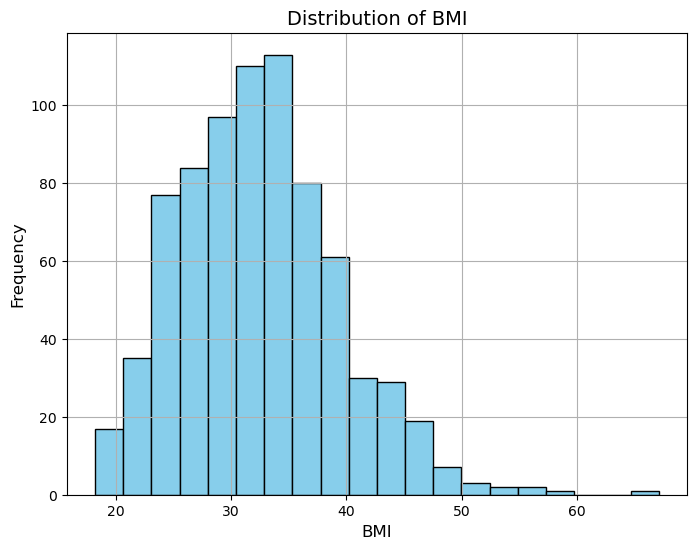

In [8]:
# Histogram Plot for BMI
def Histogram_BMI(data, column_name, title="Distribution of Data", xlabel="Value", ylabel="Frequency"):
    
    plt.figure(figsize=(8,6))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}', fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

# Call the column's functionality for the "BMI".
Histogram_BMI(final_cleaned_data['BMI'], column_name='BMI', title="Distribution of BMI Levels", xlabel="BMI")

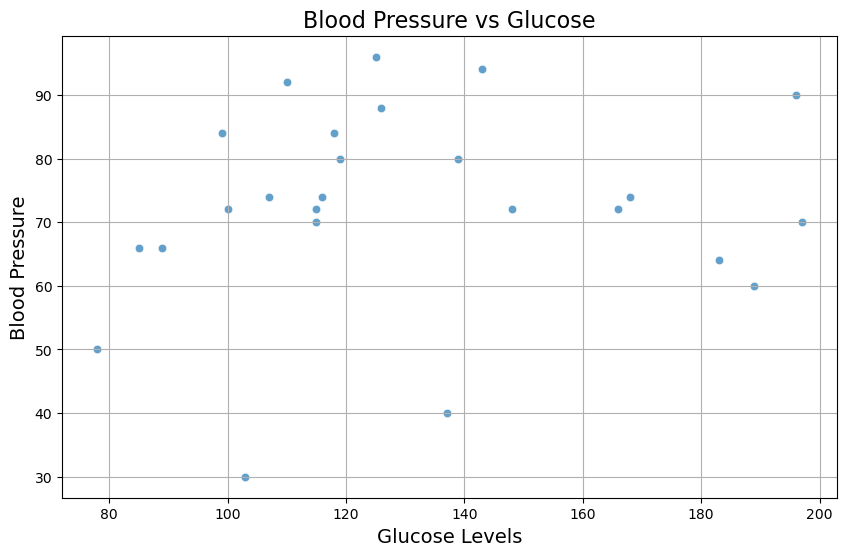

Interpretation: Analyze the relationship between Glucose and BloodPressure.


In [9]:
# Scatter Plot (Relational Graph)
def scatter(data, x, y, title="Scatter Plot", xlabel=None, ylabel=None):
    
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data.head(25), alpha=0.7)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel if xlabel else x, fontsize=14)
    plt.ylabel(ylabel if ylabel else y, fontsize=14)
    plt.grid(True)
    plt.show()
    print(f"Interpretation: Analyze the relationship between {x} and {y}.")

scatter(final_cleaned_data, x='Glucose', y='BloodPressure', title="Blood Pressure vs Glucose", 
             xlabel="Glucose Levels", ylabel="Blood Pressure")

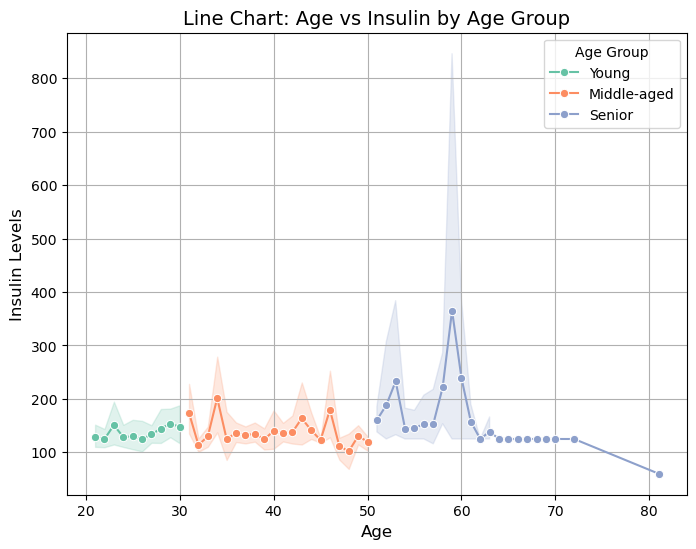

In [10]:
# Line Chart for Age vs Insulin by Age Group
def line_chart(data, x_column, y_column, hue_column=None, title="Line Chart", xlabel=None, ylabel=None):
    
    plt.figure(figsize=(8,6))
    sns.lineplot(x=x_column, y=y_column, hue=hue_column, data=data, marker="o", palette='Set2')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel if xlabel else x_column, fontsize=12)
    plt.ylabel(ylabel if ylabel else y_column, fontsize=12)
    plt.grid(True)
    plt.show()

final_cleaned_data['Age Group'] = pd.cut(final_cleaned_data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])

line_chart(final_cleaned_data, x_column='Age', y_column='Insulin', hue_column='Age Group', title="Line Chart: Age vs Insulin by Age Group", xlabel="Age", ylabel="Insulin Levels")


/var/folders/wt/ty21shy558n52g1rr7brrp9w0000gn/T/ipykernel_1486/3137914211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, data=data, palette=palette)


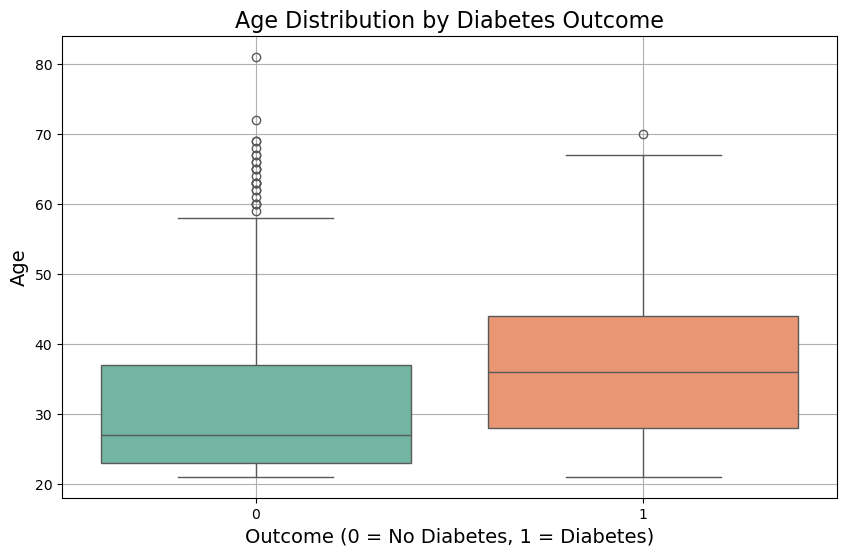

Interpretation: Compare Age distribution across categories of Outcome.


In [11]:
# Box Plot (Categorical Graph)
def box(data, x, y, title="Box Plot", xlabel=None, ylabel=None, palette='Set2'):
 
    plt.figure(figsize=figsize)
    sns.boxplot(x=x, y=y, data=data, palette=palette)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel if xlabel else x, fontsize=14)
    plt.ylabel(ylabel if ylabel else y, fontsize=14)
    plt.grid(True)
    plt.show()
    print(f"Interpretation: Compare {y} distribution across categories of {x}.")

box(final_cleaned_data, x='Outcome', y='Age', title="Age Distribution by Diabetes Outcome", 
         xlabel="Outcome (0 = No Diabetes, 1 = Diabetes)", ylabel="Age")